In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# load data
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df[["Survived","Age", "SibSp", "Parch"]].describe()

,Survived,Age,SibSp,Parch
count,891.000000,714.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594
std,0.486592,14.526497,1.102743,0.806057
min,0.000000,0.420000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000
75%,1.000000,38.000000,1.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000


In [5]:
titanic_df.describe(include=[np.object])

/var/folders/ns/h76j0lmj3f36gyjjdrtlhg1r0000gn/T/ipykernel_54199/1429244643.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  titanic_df.describe(include=[np.object])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# check the distribution of different classes
titanic_df.Pclass.value_counts() / len(titanic_df)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

# Deal with missing values 

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# check the statistic of age adn then fill in missing values in age 
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
titanic_df=pd.read_csv("titanic.csv")

# get median age of all passengers
age_median1 = titanic_df.Age.median()

# use fillna to fill in，inplace=True means making changes on titanic_df上
titanic_df.Age.fillna(age_median1, inplace=True)

titanic_df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [10]:
titanic_df=pd.read_csv("titanic.csv")

age_median2 = titanic_df.groupby('Sex').Age.median()

# set sex as index
titanic_df.set_index('Sex', inplace=True)

titanic_df.Age.fillna(age_median2, inplace=True)
# cancel sex as index
titanic_df.reset_index(inplace=True)

titanic_df.Age.describe()

count    891.000000
mean      29.441268
std       13.018747
min        0.420000
25%       22.000000
50%       29.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

# The factors that will influence survival 

## Classes ? 

In [11]:

# ratio of differenct classes 
titanic_df[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)



,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

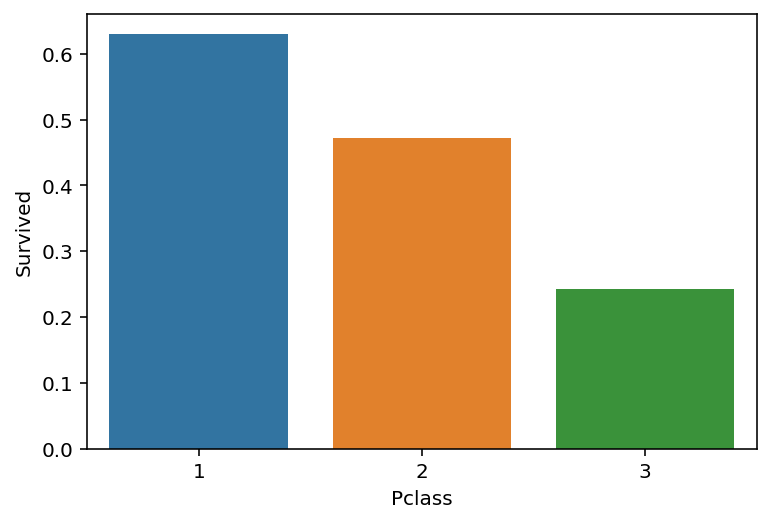

In [12]:
sns.barplot(data=titanic_df, x='Pclass', y='Survived', ci=None)

### Conclusion 1: 1st class have the most survivals, followed by 2nd class, the 3rd class has the least survivals.

# Sex ? 

In [13]:
# see the survival ratio of two sex
titanic_df[["Sex", "Survived"]].groupby('Sex').mean() \
    .sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

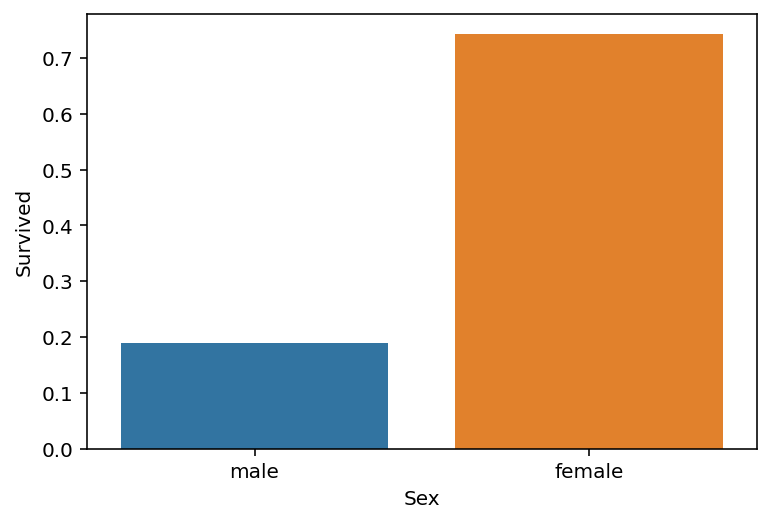

In [14]:
sns.barplot(data=titanic_df, x='Sex', y='Survived', ci=None)

### Conclusion 2: All of the survivals, 74% are women while 18% are men.

# Both class and sex ? 

In [15]:
titanic_df[['Pclass','Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()


Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [16]:
# or use pivot table 
titanic_df.pivot_table(values='Survived', index=['Pclass', 'Sex'], aggfunc=np.mean)



Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

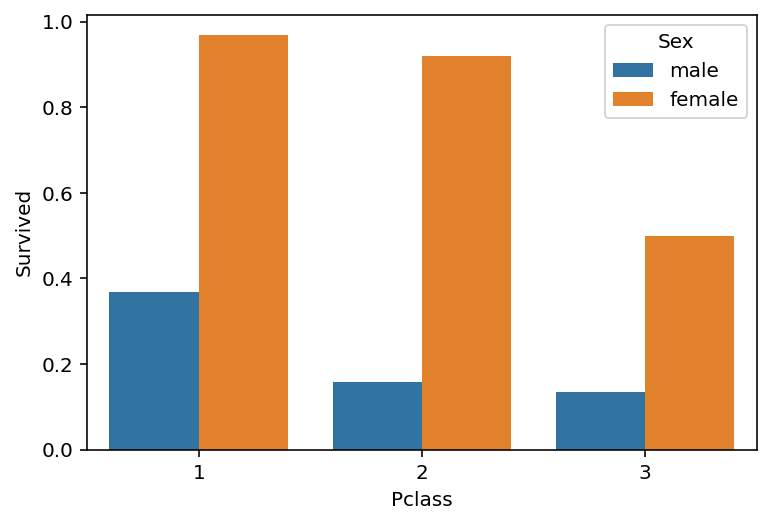

In [17]:
sns.barplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex', ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

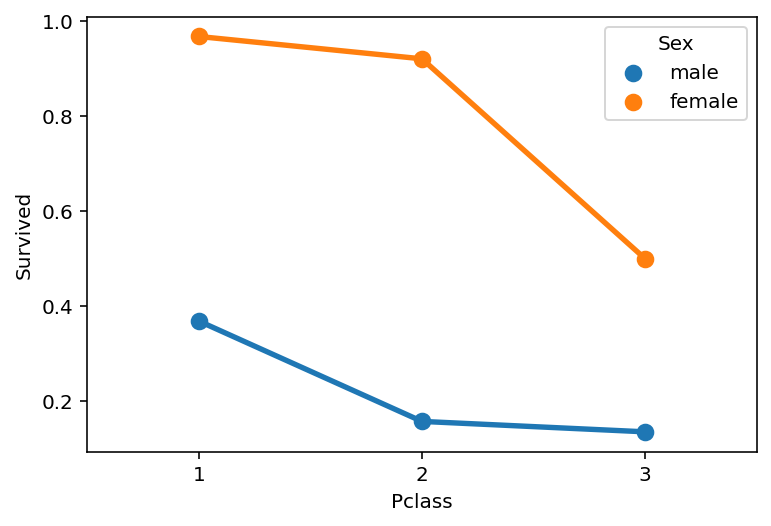

In [18]:
sns.pointplot(data=titanic_df, x='Pclass', y='Survived', hue='Sex', ci=None)


# age?

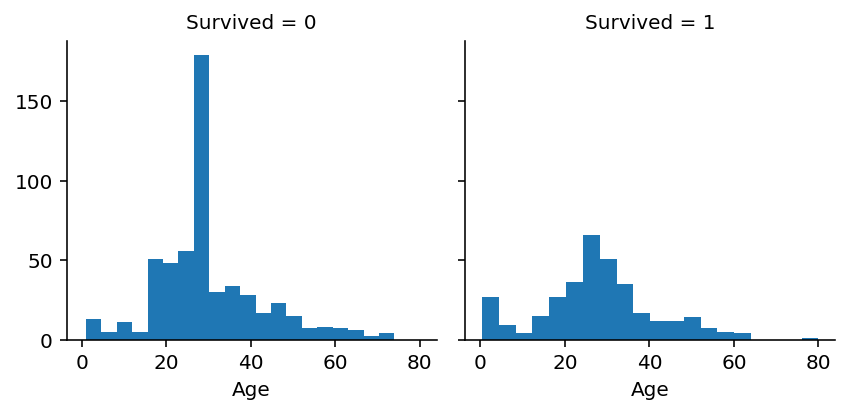

In [19]:
# use FacetGrid().map()
sns.FacetGrid(titanic_df, col='Survived').map(plt.hist, 'Age', bins=20)


# Conclusions: 

- 1. In every classes, female has more survivals than male.
- 2. The survivals of female in class 1 and 2 are very close. 
- 3. The survivals of male in class 1 are more than men in class 2 and 3.
- 4. The survivals of male in class 2 and 3 are very close.
- 5. Children have more chances to survive.